In [17]:
#all into numeric, categorial into dummy
#x is predictor
#y is predicted

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

df = pd.read_csv("titanic.csv") #import dataset

In [18]:
df=df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [19]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [20]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

In [21]:
df=df.dropna()

In [22]:
x = df.iloc[:,1:6].values #iloc not inclusive of end
y = df.iloc[:,0].values

r = 4

In [23]:
x.shape

(714, 5)

In [24]:
x_train, x_rest, y_train, y_rest = train_test_split(x, 
                y, test_size=0.25, random_state=r)

In [25]:
x_test, x_dev, y_test, y_dev = train_test_split(x, 
                y, test_size=0.50, random_state=r) #dev set takes 0.25/0.50 of the data

In [26]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(x_train, y_train)
print("Performance without pruning:", unpruned.score(x_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.9467787114845938
At depth: 20


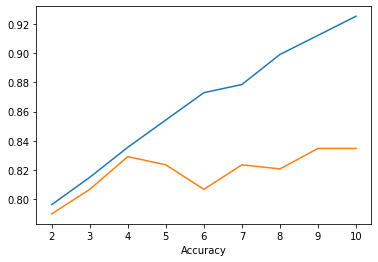

In [27]:
pruned_depths = range(2,11)
score_train = []
score_dev = []
for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=r)
    clf.fit(x_train, y_train)
    score1 = clf.score(x_train, y_train)
    score2 = clf.score(x_dev, y_dev)
    score_train.append(score1)
    score_dev.append(score2)

fig, ax = plt.subplots()
ax.plot(pruned_depths, score_train)
ax.plot(pruned_depths, score_dev)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()
#overfitting as accuracies of training set climbs up but for development set it does not catch up, even start to fall before picking up but at a lower value , optimal depth at 4

In [28]:
# train the final Random Forest model, and fit it to the Training data
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)

# make predictions on the Test data
y_pred = clf.predict(x_test).reshape(-1,1)

In [29]:
print("Accuracy:\t", clf.score(x_test, y_test))

Accuracy:	 0.8263305322128851


In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=r)
forest.fit(x_train, y_train)
print("Accuracy of random forest:\t", clf.score(x_test, y_test))
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False) #descending order
feature_imp

Accuracy of random forest:	 0.8263305322128851


1    0.532929
0    0.230328
2    0.148509
3    0.056116
4    0.032118
dtype: float64

In [31]:
x = x[:, :3] #first three columns
# retrain 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
clf.fit(x_train,y_train)
print("Accuracy base:",clf.score(x_test, y_test))

Accuracy base: 0.7767441860465116


Better accuracy when using all features

In [32]:
x = df.iloc[:,1:6].values

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ensemble = AdaBoostClassifier(n_estimators=150, random_state=r)
ensemble.fit(x_train, y_train)
ensemble.predict(x_test)
ensemble.score(x_test, y_test)

0.7627906976744186

In [34]:
from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(base_estimator=clf, n_estimators=250, random_state=r) #n_estimators creates 250 decision trees, compiling their results and averaging out the results
ensemble.fit(x_train,y_train)
ensemble.predict(x_test)
ensemble.score(x_test, y_test)

0.7674418604651163

n_estimators was manually inputted and various solutions were run. final n_estimators was chosen when resulting accuracy had the highest value for many n_estimators tried  